# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('base_tratada.csv')

df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
df.shape

(16650, 29)

In [5]:
df = df.drop_duplicates()
df.shape

(6770, 29)

In [9]:
df.isna().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [12]:
df.reset_index(drop=True, inplace=True)

df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [22]:
target_column = 'mau'

# Separate target variable from explanatory variables
X = df.drop(target_column, axis=1)  # Explanatory variables
y = df[target_column]  # Response variable

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (4739, 28)
X_valid shape: (2031, 28)
y_train shape: (4739,)
y_valid shape: (2031,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [36]:
# 1)Defina um objeto com a função da árvore de decisão

clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [38]:
# 2)Treinando o modelo

clf_dt = clf_dt.fit(X_train,y_train)
clf_dt

DecisionTreeClassifier(random_state=100)

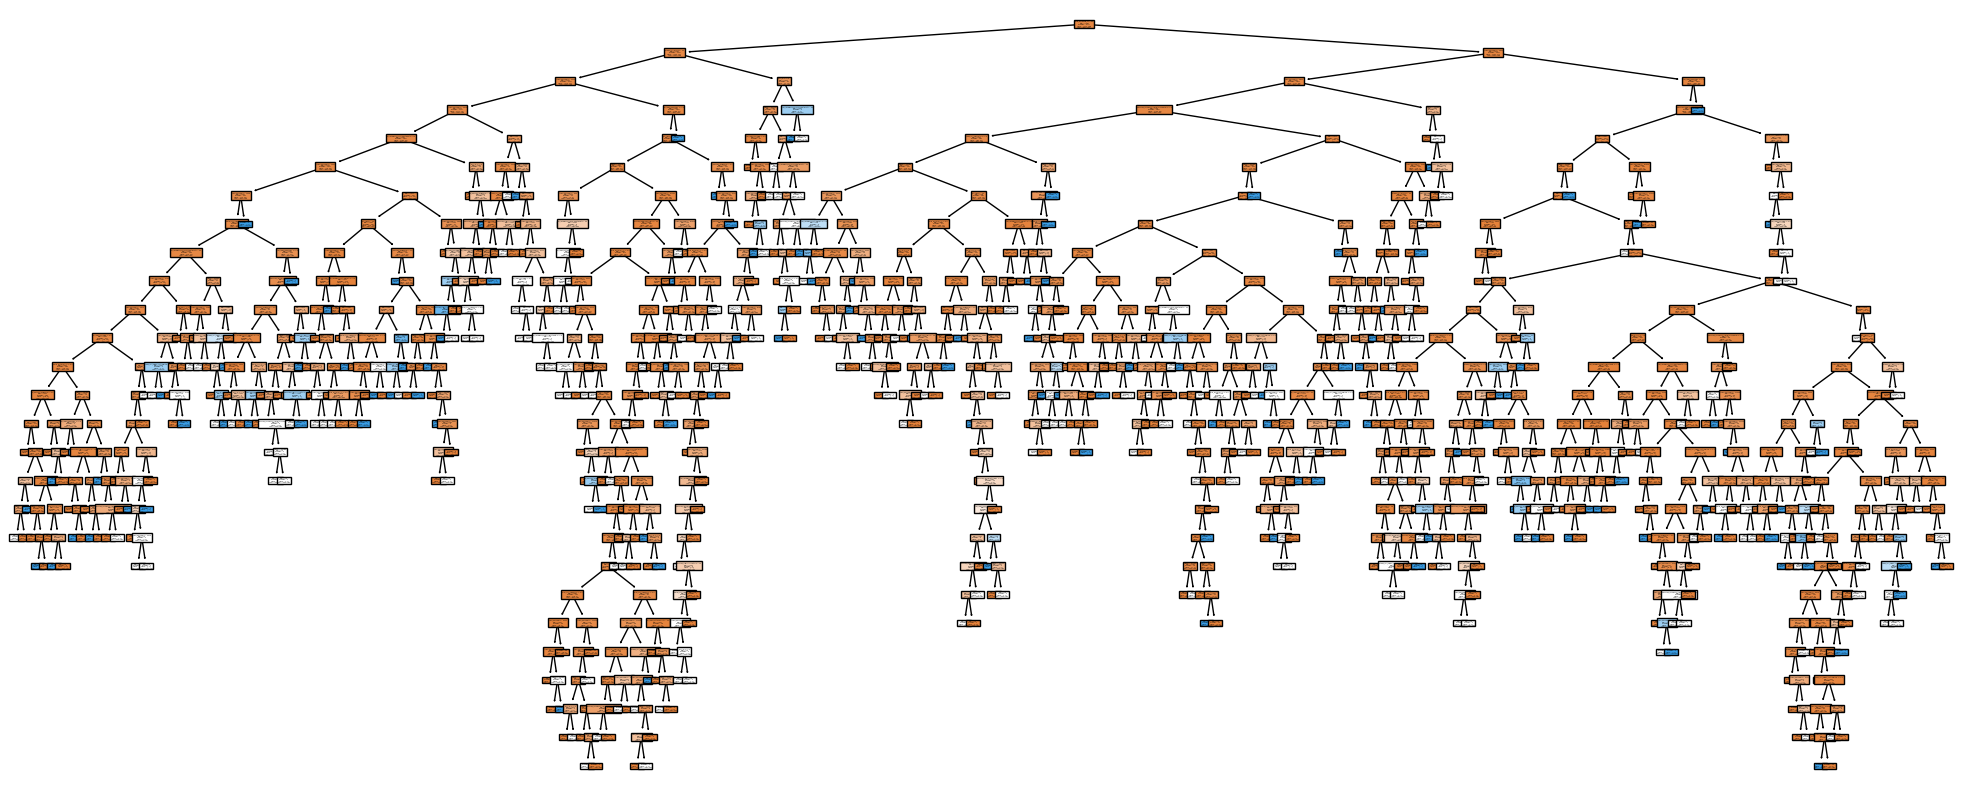

In [34]:
# 3)Plotando a arvore

plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['reprovado', 'aprovado'],
          feature_names=X.columns);

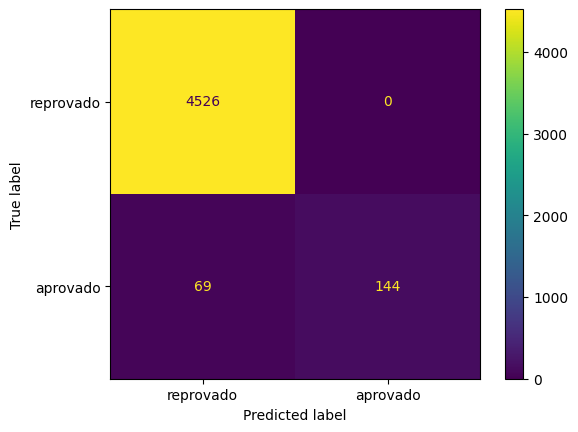

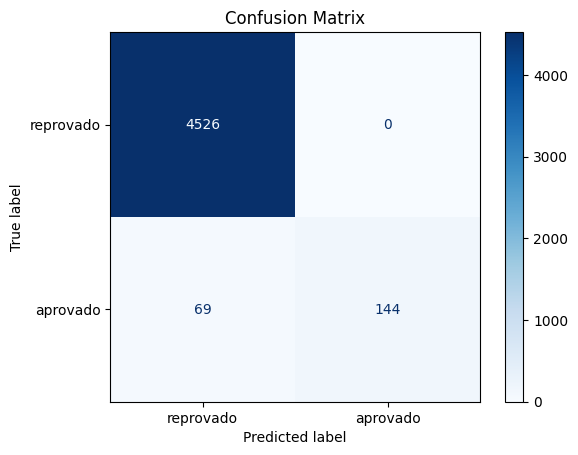

In [39]:
# 4) Criando matriz de confusão

disp = ConfusionMatrixDisplay.from_estimator(clf_dt, X_train, y_train, display_labels=['reprovado', 'aprovado'])

disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()

In [41]:
#5) Calculando a acurácia na base de treinamento

predict = clf_dt.predict(X_train)
accuracy_score(y_train, predict)

0.9854399662376029

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [44]:
# 4) Classificando a base

y_chapeu_teste = clf_dt.predict(X_valid)
y_chapeu_teste

array([False, False,  True, ..., False, False, False])

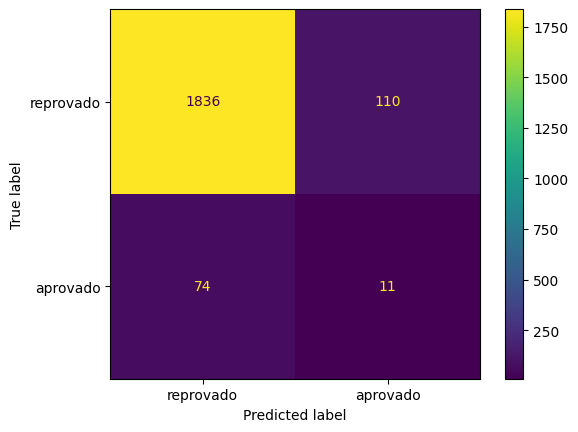

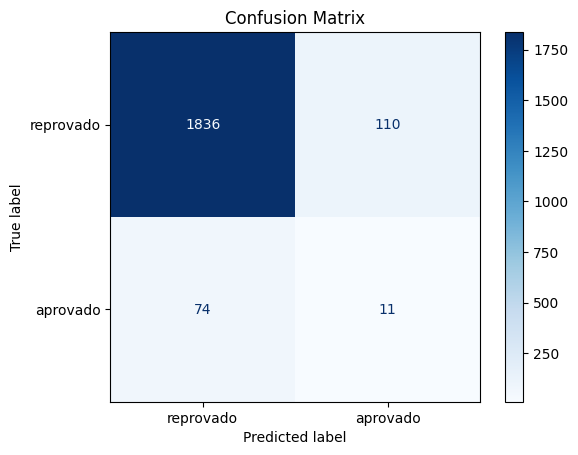

In [45]:
# 2) Criando matriz de confusão

disp = ConfusionMatrixDisplay.from_estimator(clf_dt, X_valid, y_valid, display_labels=['reprovado', 'aprovado'])

disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()

In [46]:
#3) Calculando a acurácia na base de teste

predict = clf_dt.predict(X_valid)
accuracy_score(y_valid, predict)

0.9094042343673068

A base de treino teve uma acurácia de 98,5% enquanto a base de teste foi de 90,4%. O que mostra que o modelo teve um ótimo desempenho e não "overfittou".

In [48]:
#4) Treinando uma nova árvore com os requisitos solicitados

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_valid)
accuracy_score(y_valid, predict)

0.9561792220580995

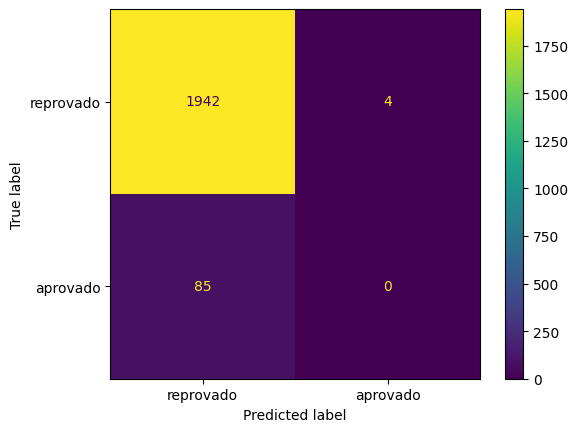

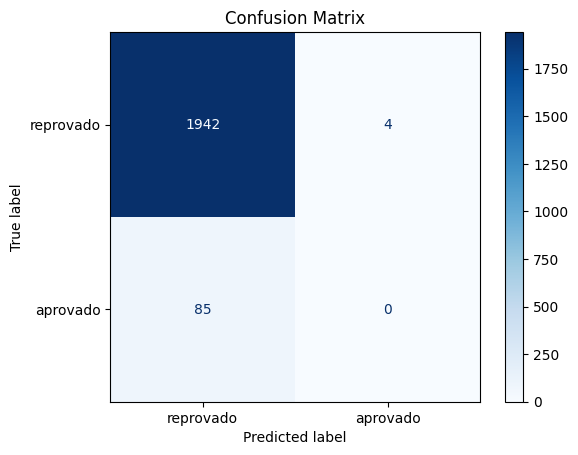

In [49]:
# 5) Analisando a matriz de classificação

disp = ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid, display_labels=['reprovado', 'aprovado'])

disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()

In [56]:
# 6) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

print(y_valid.value_counts())

porcentagem = 1946/2031
print(porcentagem)

False    1946
True       85
Name: mau, dtype: int64
0.9581486952240276


Caso todos fossem considerados "bons", teríamos um acurácia de 0.9581486952240276,
a do nosso modelo foi de 0.9561792220580995.

O que indica que o modelo modelo foi um pouco inferior em relação a só classificar todos como bons,
ainda podemos fazer alguns ajustes para melhorá-lo.